In [1]:
import voxelmorph as vxm
print(vxm.__file__)

D:\Computer_vision\voxelmorph\voxelmorph\__init__.py


In [1]:
import os
import random

# === Cấu hình đường dẫn ===
base_dir = r"D:\Computer_vision\voxel_morph\neurite-oasis.v1.0"
subject_file = os.path.join(base_dir, "subjects.txt")
output_pairs = os.path.join(base_dir, "pairs_test.txt")
atlas_path = r"D:\Computer_vision\voxel_morph\data\atlas.npz"  # đường dẫn atlas tương đối hoặc tuyệt đối đều được

# === Đọc danh sách các subject từ subjects.txt ===
with open(subject_file, "r") as f:
    subjects = [line.strip() for line in f if line.strip()]

# === Kiểm tra xem có đủ file cần thiết ===
valid_subjects = []
for subj in subjects:
    subj_dir = os.path.join(base_dir, subj)
    norm_path = os.path.join(subj_dir, "aligned_norm.nii.gz")
    seg_path = os.path.join(subj_dir, "aligned_seg35.nii.gz")
    if os.path.exists(norm_path) and os.path.exists(seg_path):
        valid_subjects.append(subj)
    else:
        print(f"⚠️ Missing file(s) in {subj}")

print(f"✅ Found {len(valid_subjects)} valid subjects out of {len(subjects)} total.")

# === Chọn ngẫu nhiên N ảnh để test ===
N = 20  # số ảnh test, bạn có thể đổi (VD: 50)
test_subjects = random.sample(valid_subjects, N)

# === Ghi ra file pairs.txt ===
with open(output_pairs, "w") as f:
    for subj in test_subjects:
        subj_path = os.path.join(base_dir, subj)
        f.write(f"{subj_path} {atlas_path}\n")

print(f"✅ Saved {N} test pairs to {output_pairs}")


✅ Found 414 valid subjects out of 414 total.
✅ Saved 20 test pairs to D:\Computer_vision\voxel_morph\neurite-oasis.v1.0\pairs_test.txt


In [6]:
subjects_file = r"D:\Computer_vision\voxel_morph\neurite-oasis.2d.v1.0\subjects.txt"
with open(subjects_file, "r") as f:
    subjects = f.read().splitlines()

print("Tổng số subjects:", len(subjects))
print("10 dòng đầu:", subjects[:10])

Tổng số subjects: 414
10 dòng đầu: ['OASIS_OAS1_0001_MR1', 'OASIS_OAS1_0002_MR1', 'OASIS_OAS1_0003_MR1', 'OASIS_OAS1_0004_MR1', 'OASIS_OAS1_0005_MR1', 'OASIS_OAS1_0006_MR1', 'OASIS_OAS1_0007_MR1', 'OASIS_OAS1_0009_MR1', 'OASIS_OAS1_0010_MR1', 'OASIS_OAS1_0011_MR1']


In [7]:
import os

base_dir = r"D:\Computer_vision\voxel_morph\neurite-oasis.2d.v1.0"

# Tạo đường dẫn tuyệt đối đến aligned_norm.nii.gz
paths = [os.path.join(base_dir, subj, "slice_norm.nii.gz") for subj in subjects]

# Kiểm tra 5 đường dẫn đầu
paths[:5]

['D:\\Computer_vision\\voxel_morph\\neurite-oasis.2d.v1.0\\OASIS_OAS1_0001_MR1\\slice_norm.nii.gz',
 'D:\\Computer_vision\\voxel_morph\\neurite-oasis.2d.v1.0\\OASIS_OAS1_0002_MR1\\slice_norm.nii.gz',
 'D:\\Computer_vision\\voxel_morph\\neurite-oasis.2d.v1.0\\OASIS_OAS1_0003_MR1\\slice_norm.nii.gz',
 'D:\\Computer_vision\\voxel_morph\\neurite-oasis.2d.v1.0\\OASIS_OAS1_0004_MR1\\slice_norm.nii.gz',
 'D:\\Computer_vision\\voxel_morph\\neurite-oasis.2d.v1.0\\OASIS_OAS1_0005_MR1\\slice_norm.nii.gz']

In [8]:
train_paths = paths[:331]
test_paths = paths[331:]

# Lưu file train.txt
with open("train.txt", "w") as f:
    for p in train_paths:
        f.write(p + "\n")

# Lưu file test.txt
with open("test.txt", "w") as f:
    for p in test_paths:
        f.write(p + "\n")

print("Đã tạo train.txt và test.txt")

Đã tạo train.txt và test.txt


In [ ]:
import os

# folder chứa các MRI 2D
mri_folder = r"D:/Computer_vision/voxel_morph/neurite-oasis.2d.v1.0/"

# file atlas
atlas_file = r"./data/atlas_2d_norm.npz"

# tên file pairs.txt
pairs_file = "pairs.txt"

# tìm tất cả file slice_norm.nii.gz
mri_files = []
for root, dirs, files in os.walk(mri_folder):
    for f in files:
        if f.endswith("slice_norm.nii.gz"):
            mri_files.append(os.path.join(root, f))

# sắp xếp theo tên file (tùy chọn)
mri_files.sort()

# tạo file pairs.txt
with open(pairs_file, "w") as f:
    for mri in mri_files:
        f.write(f"{mri} {atlas_file}\n")

print(f"Đã tạo file {pairs_file} với {len(mri_files)} dòng.")


In [9]:
# file chứa danh sách các MRI 2D
test_file = r"D:\Computer_vision\voxel_morph\neurite-oasis.2d.v1.0\test.txt"

# file atlas
atlas_file = r"D:\Computer_vision\voxel_morph\data\atlas_norm_2d.npz"

# tên file pairs.txt sẽ tạo ra
pairs_file = "pairs.txt"

# đọc danh sách các file MRI từ test.txt
with open(test_file, "r") as f:
    mri_files = [line.strip() for line in f if line.strip()]

# tạo file pairs.txt
with open(pairs_file, "w") as f:
    for mri in mri_files:
        f.write(f"{mri} {atlas_file}\n")

print(f"Đã tạo file {pairs_file} với {len(mri_files)} dòng.")

Đã tạo file pairs.txt với 83 dòng.


In [10]:
import numpy as np
import nibabel as nib

atlas_npz = r"D:\Computer_vision\voxel_morph\data\atlas_norm_2d.npz"
atlas_nii = r"D:\Computer_vision\voxel_morph\data\atlas_norm_2d.nii.gz"

data = np.load(atlas_npz)['vol']  # chọn key 'vol' trong npz
# data shape có thể là (1, H, W, 1), lấy squeeze
data = np.squeeze(data)

nii = nib.Nifti1Image(data, affine=np.eye(4))
nib.save(nii, atlas_nii)
print("Đã lưu atlas ra NIfTI:", atlas_nii)


Đã lưu atlas ra NIfTI: D:\Computer_vision\voxel_morph\data\atlas_norm_2d.nii.gz


In [11]:
import numpy as np
import nibabel as nib

atlas_npz = r"D:\Computer_vision\voxel_morph\data\atlas_norm_2d.npz"
atlas_nii = r"D:\Computer_vision\voxel_morph\data\atlas_seg_2d.nii.gz"

data = np.load(atlas_npz)['seg']  # chọn key 'vol' trong npz
# data shape có thể là (1, H, W, 1), lấy squeeze
data = np.squeeze(data)

nii = nib.Nifti1Image(data, affine=np.eye(4))
nib.save(nii, atlas_nii)
print("Đã lưu atlas ra NIfTI:", atlas_nii)


Đã lưu atlas ra NIfTI: D:\Computer_vision\voxel_morph\data\atlas_seg_2d.nii.gz


In [12]:
import numpy as np
import nibabel as nib

atlas_npz = r"D:\Computer_vision\voxel_morph\data\atlas_norm_2d.npz"

# load key 'seg' (hoặc key bạn muốn)
data = np.load(atlas_npz)['seg']
data = np.squeeze(data)

# liệt kê các nhãn có trong atlas
labels = np.unique(data)
print("Các nhãn trong atlas:", labels)
print("Số nhãn:", len(labels))


Các nhãn trong atlas: [ 0.  2.  3.  4.  5.  7. 10. 14. 15. 16. 17. 24. 28. 31. 41. 42. 43. 44.
 46. 49. 53. 60. 63.]
Số nhãn: 23


Moving seg shape: (160, 192, 1)
Unique labels (moving): [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 22. 23. 24.]
Keys in atlas file: ['seg', 'vol']
Fixed atlas shape: (160, 192)
Fixed seg shape: (160, 192)
Unique labels (fixed): [ 0.  2.  3.  4.  5.  7. 10. 14. 15. 16. 17. 24. 28. 31. 41. 42. 43. 44.
 46. 49. 53. 60. 63.]


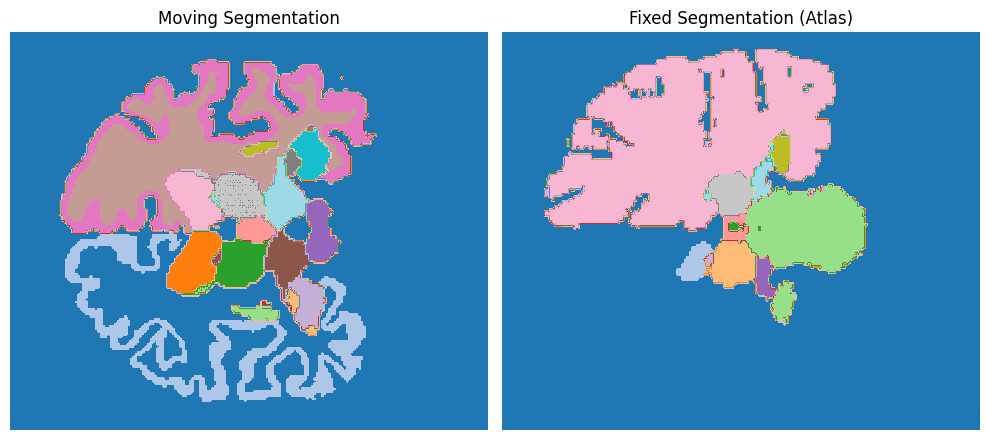

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load segmentation moving (nii.gz)
moving_seg_path = r"D:\Computer_vision\voxel_morph\neurite-oasis.2d.v1.0\OASIS_OAS1_0001_MR1\slice_seg24.nii.gz"
moving_seg = nib.load(moving_seg_path).get_fdata()

print("Moving seg shape:", moving_seg.shape)
print("Unique labels (moving):", np.unique(moving_seg))

# --- 2. Load atlas segmentation (npz)
atlas_path = r"D:\Computer_vision\voxel_morph\data\atlas_norm_2d.npz"
atlas_data = np.load(atlas_path)
print("Keys in atlas file:", list(atlas_data.keys()))

if 'vol' in atlas_data:
    fixed_img = atlas_data['vol']
elif 'image' in atlas_data:
    fixed_img = atlas_data['image']
else:
    fixed_img = list(atlas_data.values())[0]  # lấy phần tử đầu tiên

print("Fixed atlas shape:", fixed_img.shape)

# --- 3. Nếu atlas có segmentation mask
if 'seg' in atlas_data:
    fixed_seg = atlas_data['seg']
    print("Fixed seg shape:", fixed_seg.shape)
    print("Unique labels (fixed):", np.unique(fixed_seg))
else:
    print("⚠️ Atlas file không chứa segmentation mask ('seg').")

# --- 4. Hiển thị so sánh trực quan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(moving_seg, cmap="tab20")
plt.title("Moving Segmentation")
plt.axis("off")

if 'seg' in atlas_data:
    plt.subplot(1, 2, 2)
    plt.imshow(fixed_seg, cmap="tab20")
    plt.title("Fixed Segmentation (Atlas)")
    plt.axis("off")

plt.tight_layout()
plt.show()


Moving seg shape: (160, 192, 1)
Unique labels (moving): [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23.]
Keys in atlas file: ['seg', 'vol']
Fixed atlas shape: (160, 192)
Fixed seg shape: (160, 192)
Unique labels (fixed): [ 0.  2.  3.  4.  5.  7. 10. 14. 15. 16. 17. 24. 28. 31. 41. 42. 43. 44.
 46. 49. 53. 60. 63.]


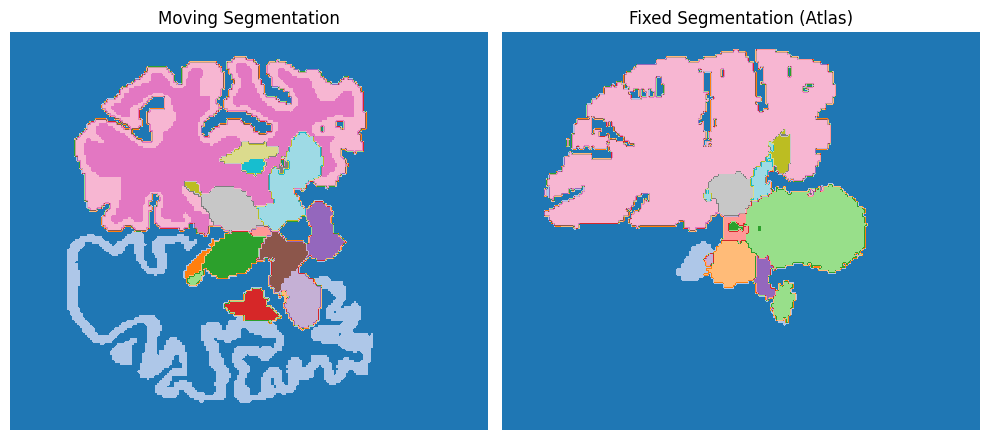

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load segmentation moving (nii.gz)
moving_seg_path = r"D:\Computer_vision\voxel_morph\neurite-oasis.2d.v1.0\OASIS_OAS1_0002_MR1\slice_seg24.nii.gz"
moving_seg = nib.load(moving_seg_path).get_fdata()

print("Moving seg shape:", moving_seg.shape)
print("Unique labels (moving):", np.unique(moving_seg))

# --- 2. Load atlas segmentation (npz)
atlas_path = r"D:\Computer_vision\voxel_morph\data\atlas_norm_2d.npz"
atlas_data = np.load(atlas_path)
print("Keys in atlas file:", list(atlas_data.keys()))

if 'vol' in atlas_data:
    fixed_img = atlas_data['vol']
elif 'image' in atlas_data:
    fixed_img = atlas_data['image']
else:
    fixed_img = list(atlas_data.values())[0]  # lấy phần tử đầu tiên

print("Fixed atlas shape:", fixed_img.shape)

# --- 3. Nếu atlas có segmentation mask
if 'seg' in atlas_data:
    fixed_seg = atlas_data['seg']
    print("Fixed seg shape:", fixed_seg.shape)
    print("Unique labels (fixed):", np.unique(fixed_seg))
else:
    print("⚠️ Atlas file không chứa segmentation mask ('seg').")

# --- 4. Hiển thị so sánh trực quan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(moving_seg, cmap="tab20")
plt.title("Moving Segmentation")
plt.axis("off")

if 'seg' in atlas_data:
    plt.subplot(1, 2, 2)
    plt.imshow(fixed_seg, cmap="tab20")
    plt.title("Fixed Segmentation (Atlas)")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
import os
import random

# File chứa danh sách các thư mục con
subjects_file = r"D:\Computer_vision\voxel_morph\neurite-oasis.2d.v1.0\subjects.txt"
base_dir = r"D:\Computer_vision\voxel_morph\neurite-oasis.2d.v1.0"

# Đọc file và lấy danh sách các dòng
with open(subjects_file, 'r') as f:
    all_subjects = [line.strip() for line in f.readlines()]

# Lấy 83 dòng cuối cùng
last_83_subjects = all_subjects[-83:]

# Ghép với đường dẫn gốc để thành đường dẫn tuyệt đối
last_83_paths = [os.path.join(base_dir, d) for d in last_83_subjects]

# Tạo 100 cặp ngẫu nhiên
pairs = []
for _ in range(50):
    pair = random.sample(last_83_paths, 2)  # lấy 2 đường dẫn khác nhau
    pairs.append(pair)

# Lưu vào file pairs.txt
output_file = os.path.join(base_dir, 'pairs.txt')
with open(output_file, 'w') as f:
    for pair in pairs:
        f.write(f"{pair[0]} {pair[1]}\n")

print(f"Đã tạo xong 100 cặp và lưu vào {output_file}")


Đã tạo xong 100 cặp và lưu vào D:\Computer_vision\voxel_morph\neurite-oasis.2d.v1.0\pairs.txt
